# Market segmentation example

## Import the relevant libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [20]:
data = pd.read_csv ('C:/Users/Lenovo/Downloads/3.12. Example.csv')

In [21]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Text(0, 0.5, 'Loyalty')

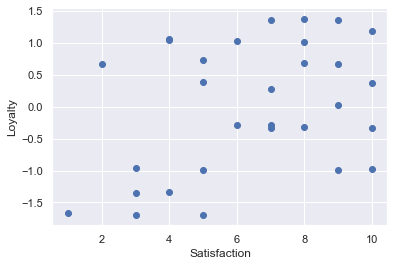

In [22]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [23]:
x = data.copy()

## Clustering

In [24]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [25]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

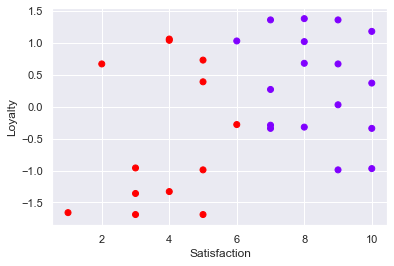

In [26]:
#Standardization  هذا الشكل يوضح التجميع على البيانات بدون  
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

In [27]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [28]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.34807941029098,
 4.337110750237059,
 3.7799886162052663]

Text(0, 0.5, 'WCSS')

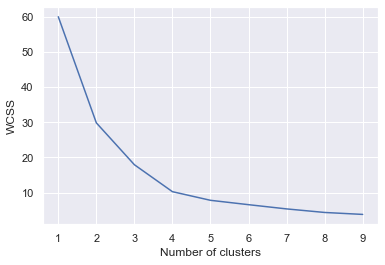

In [29]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### Explore clustering solutions and select the number of clusters

In [30]:
#هنا بالسطر الاول نحدد عدد مجموعات التجميع.
#من الشكل اعلاه موضح انه افضل شيء يكون من 2الى5 وبعد التطبيق توضح لي انه افضل يكون 4او 5  
Kmeans_new=KMeans(4)
Kmeans_new.fit(x_scaled)
clusters_new=x.copy()
clusters_new['cluster_pred']=Kmeans_new.fit_predict(x_scaled)

In [31]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,3
5,1,-1.66,2
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

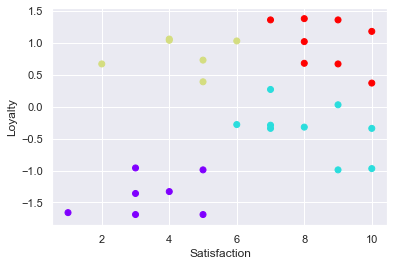

In [18]:
#   Standardization  هذا الشكل يوضح التجميع على البيانات بعد ماسوينا لها 
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
#لقراءة الشكل ادناه بوضوح اكثر يجب علينا تسمية المجموعات
#   (Fans) مثلا المجموعة الحمراء  
#(Roamers) مثلا المجموعة السماوي
#(Alienated) مثلا المجموعة البنفسجي
#(Supporters) مثلا المجموعة الخضراء